In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Индекс NIKKEI (NKY Index)

In [106]:
indexes = pd.read_excel('data.xlsx', sheet_name='static')
indexes = indexes.set_index("Dates")
nky = indexes["NKY Index"]
nky.describe()

count     9827.000000
mean     18684.288694
std       7319.177238
min       7054.980000
25%      12972.640000
50%      17572.680000
75%      22498.840000
max      42224.020000
Name: NKY Index, dtype: float64

In [107]:
nky.resample("YE").last().pct_change(fill_method=None).describe()

count    40.000000
mean      0.053806
std       0.229169
min      -0.421238
25%      -0.098097
50%       0.059135
75%       0.191278
max       0.567198
Name: NKY Index, dtype: float64

<Axes: xlabel='Dates'>

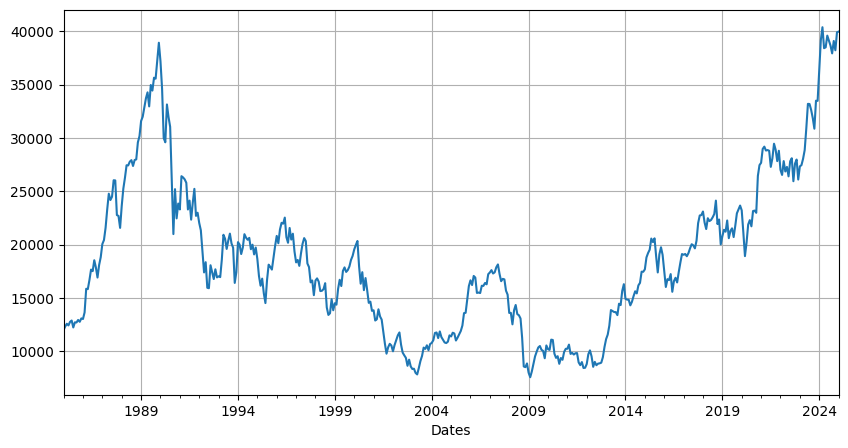

In [108]:
nky.resample("ME").last().plot(figsize=(10, 5), grid=1)

In [109]:
macro = pd.read_excel('Macro econ inputs.xlsx', sheet_name='Japan')
macro = macro.set_index("Dates")
macro.index = pd.to_datetime(macro.index)

rename_dict = {
    'BISPMJAP Index': 'Policy Rate',
    'GTJPY2Y Govt': '2Y',
    'GTJPY10Y Govt': '10Y',
    'GTJPYII5Y Govt': '5Y Inf Protected',
    'GTJPY5Y Govt': '5Y',
    'JNCPIYOY Index': 'Inflation',
    'JNIPYOY Index': 'Indu',
    'JGDPAGDP Index': 'GDP',
    'JNUNRT Index': 'Urate',
    'JNLSUCTL Index': 'Wages',
    'EHBBJPY Index': 'Budget Balance',
    'ECOYBJPN Index': 'Trade Balance',
    'ECOXJPS Index': 'Nominal GDP',
    'GRZEJPIN Index': 'Inflation Expectation Index'
}
macro.rename(columns=rename_dict, inplace=True)
macro.describe()


,Policy Rate,2Y,10Y,5Y Inf Protected,5Y,Inflation,Indu,GDP,Urate,Wages,Budget Balance,Trade Balance,Nominal GDP,Inflation Expectation Index
count,188.000000,128.000000,147.000000,53.000000,140.000000,220.000000,188.000000,126.000000,98.000000,140.000000,54.000000,224.000000,183.000000,119.000000
mean,2.731915,0.338633,1.774000,-0.368038,1.032336,2.436364,0.993085,0.874603,3.682653,0.214286,-3.853889,27.545536,4129.075246,20.923529
std,2.791266,0.574954,1.808644,0.976346,1.475882,4.139932,6.820471,4.772269,1.038141,2.069740,3.189485,62.424809,1400.564324,22.351456
min,-0.100000,-0.324000,-0.222000,-2.285000,-0.361000,-2.200000,-32.800000,-25.900000,2.100000,-7.100000,-10.300000,-162.900000,990.790000,-58.700000
25%,0.100000,0.011250,0.553500,-0.988000,0.156750,0.000000,-1.975000,-0.775000,2.700000,-0.825000,-5.747500,-2.575000,3553.570000,5.400000
50%,2.125000,0.136000,1.353000,-0.542000,0.566500,1.100000,1.450000,1.100000,3.650000,0.400000,-4.015000,24.050000,4554.430000,16.200000
75%,5.062500,0.601750,1.926000,0.046000,1.206000,3.200000,4.425000,3.500000,4.550000,1.425000,-2.312500,77.675000,5022.940000,36.950000
max,9.000000,2.813000,8.240000,2.631000,7.246000,22.800000,29.300000,21.500000,5.800000,6.900000,2.040000,123.200000,6468.250000,71.200000


#### 1й вариант

In [110]:
macro1 = macro[["Policy Rate", "2Y", "10Y", "5Y", "Inflation", "Indu", "GDP", "Budget Balance", "Trade Balance"]]
macro1.loc[:, "Budget Balance"] = macro1["Budget Balance"].ffill()
macro1.loc[:, "Policy Rate"] = macro1["Policy Rate"].ffill()
macro1 = macro1.dropna()
macro1.describe()

,Policy Rate,2Y,10Y,5Y,Inflation,Indu,GDP,Budget Balance,Trade Balance
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.194841,0.315294,1.175103,0.647167,0.496825,0.085714,0.874603,-5.603175,24.470635
std,0.354786,0.542353,0.991853,0.790719,1.300704,7.588841,4.772269,2.335294,75.830756
min,-0.100000,-0.324000,-0.222000,-0.361000,-2.200000,-32.800000,-25.900000,-10.300000,-162.900000
25%,0.012500,0.003750,0.394500,0.100250,-0.300000,-2.875000,-0.775000,-7.422500,-24.300000
50%,0.100000,0.130500,1.169500,0.486000,0.150000,1.000000,1.100000,-5.310000,43.400000
75%,0.250000,0.591500,1.654750,1.044250,0.950000,3.800000,3.500000,-3.680000,85.550000
max,1.750000,2.813000,4.697000,3.965000,4.000000,29.300000,21.500000,-2.260000,123.200000


In [111]:
nky = nky.resample("QE").last().pct_change().dropna()
nky

Dates
1985-06-30    0.023952
1985-09-30   -0.014127
1985-12-31    0.030163
1986-03-31    0.212224
1986-06-30    0.113144
                ...   
2024-03-31    0.206348
2024-06-30   -0.019479
2024-09-30   -0.042026
2024-12-31    0.052084
2025-03-31    0.001613
Freq: QE-DEC, Name: NKY Index, Length: 160, dtype: float64

In [112]:
merged_data = pd.merge(macro1, nky, on='Dates', how='inner').dropna()
X = merged_data[["Policy Rate", "2Y", "10Y", "5Y", "Inflation", "Indu", "GDP", "Budget Balance", "Trade Balance"]]
y = merged_data['NKY Index']
X = sm.add_constant(X)

In [113]:
merged_data

,Policy Rate,2Y,10Y,5Y,Inflation,Indu,GDP,Budget Balance,Trade Balance,NKY Index
Dates,,,,,,,,,,
1994-06-30,1.75,2.583,4.388,3.584,0.6,0.8,-3.0,-2.50,123.2,0.080160
1994-09-30,1.75,2.813,4.697,3.888,0.2,2.4,4.1,-2.50,121.8,-0.052321
1994-12-31,1.75,2.813,4.567,3.965,0.7,5.8,-1.5,-3.70,121.5,0.008140
1995-03-31,1.75,2.028,3.703,2.824,-0.4,5.8,3.9,-3.70,118.9,-0.181671
1995-06-30,1.00,1.178,2.842,1.977,0.3,3.1,3.7,-3.70,119.4,-0.100530
...,...,...,...,...,...,...,...,...,...,...
2024-03-31,0.05,0.180,0.722,0.352,2.7,-6.2,-2.1,-4.21,-42.9,0.206348
2024-06-30,0.05,0.358,1.049,0.581,2.8,-8.2,1.0,-4.21,-39.4,-0.019479
2024-09-30,0.25,0.383,0.853,0.499,2.5,-3.2,2.7,-4.21,-44.1,-0.042026


In [114]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NKY Index   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.848
Date:                Sun, 01 Feb 2026   Prob (F-statistic):             0.0670
Time:                        19:43:29   Log-Likelihood:                 114.02
No. Observations:                 124   AIC:                            -208.0
Df Residuals:                     114   BIC:                            -179.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0124      0.032      0.386      0.701      -0.051       0.076
Policy Rate       -0.0647      0.085     -0.759      0.449      -0.234       0.104
2Y                -0.2927      0.136     -2.155      0.033      -0.562      -0.024
10Y               -0.1033      0.074     -1.405      0.163      -0.249       0.042
5Y                 0.3636      0.155      2.342      0.021       0.056       0.671
Inflation         -0.0107      0.010     -1.034      0.304      -0.031       0.010
Indu               0.0006      0.001      0.429      0.669      -0.002       0.004
GDP             2.518e-05      0.002      0.012      0.991      -0.004       0.004
Budget Balance    -0.0013      0.005     -0.230      0.819      -0.012       0.010
Trade Balance     -0.0005      0.000     -2.492      0.014      -0.001      -0.000
==============================================================================
Omnibus:                        2.915   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.164
Skew:                          -0.160   Prob(JB):                        0.339
Kurtosis:                       2.438   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""